# Deliverable 2: Project Proposal

### Group 3 - Aden Chan, Kashie Ugoji, Linda Han, Sungha Choi
--------------


### Inferential question: Does the average final grade of highschool students who do extra-curricular activities differ from those who do not?

Dataset used: https://archive.ics.uci.edu/dataset/320/student+performance


## Introduction

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).


Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.



## Preliminary Results

### 1. Importing libraries

To start doing exploratory data analysis, we first need to load in all the necessary libraries.

In [49]:
# Import tidyverse library
library(tidyverse)

### 2. Importing dataset

The dataset we are interested in is "student-mat.csv", and it contains demographic, family, personal attributes, and academic performance information about **students in math classes from two Portuguese high schools** (Cortez, 2014).

Below, we illustrate the process of unzipping and extracting the dataset from a URL. The resulting dataset will be loaded into an object called `students`.

In [50]:
# Downloads the zipfile containing the dataset if it doesn't already exist 
# and saves it to the current working directory as "dataset-zip"
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
destfile <- "./dataset-zip" 

if (!file.exists(destfile)) {
    download.file(url, destfile)
    
    # Unzips the zipfile and extracts the dataset to current working directory
    unzip(destfile, files = "student.zip") %>% unzip(files = "student-mat.csv")
}



# Read the dataset and name it `students`
students <- read_delim("./student-mat.csv", delim=";")
head(students)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


### 3. Wrangling the dataset

Now that the dataset has been successfully loaded, we will wrangle it to the desired format for our project.

According to the description provided in the documentation, the column `G3` in the dataset represents the students' final grade:

> G3 - final grade (numeric: from 0 to 20, output target)

Note: Grades in Portugal are distributed on a scale of 0-20 with 18-20 being excellent in international standards (letter grade A). (https://www.upt.pt/en/home/internationals/portuguese-grading-system-2/)

To make `G3` more readable, we mutate its name to `final_grade`.

We then select the two columns relevant to our inferential question - `activities` and the newly mutated column `final_grade`.

In [51]:
# Wrangle the dataset
students_sample <- students %>%
    mutate(final_grade = G3) %>%
    select(activities, final_grade)

head(students_sample)

activities,final_grade
<chr>,<dbl>
no,6
no,6
no,10
yes,15
no,10
yes,15


### 4. Gaining insight about the dataset

Once again, we are interested in finding the **average grade of students who do extra-curricular activities** and the **average grade of those who don't**. 

First, we try to gain some insight about the dataset by counting the total number of students and the number of them in each category (extra-curricular and no extra-curricular).

We also ensure that there are no observations with "NA" values.

We examine that there is a total number of 395 students in the dataset, and out of those students 49% of them don't do extra-curriculars while the other 51% of them do.

In [52]:
# Count the total number of students
nrow(students)

[1] 395

In [53]:
# Ensure there are no NA values
nrow(students_sample %>% filter(is.na(final_grade) | is.na(activities)))

[1] 0

In [54]:
# Count the number and proportion of students in each category
count(students, activities) %>%
mutate(prop = n / nrow(students))

activities,n,prop
<chr>,<int>,<dbl>
no,194,0.4911392
yes,201,0.5088608


We also try to calculate the mean, median, sd, maximum, and minimum final grades for students in each category.

In [75]:
# Create a summary table for the dataset
prelim_summary <- students_sample %>%
            group_by(activities) %>%
            summarize(mean_final_grade = mean(final_grade),
            median_final_grade = median(final_grade),
            sd_final_grade = sd(final_grade),
            max_final_grade = max(final_grade),
            min_final_grade = min(final_grade))

prelim_summary

activities,mean_final_grade,median_final_grade,sd_final_grade,max_final_grade,min_final_grade
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no,10.34021,11,4.488065,19,0
yes,10.48756,11,4.679861,20,0


### 5. Visualizing the dataset

We plot a histogram to study the distribution of final grades and colour by `activities`.

We can see that most bins have a roughly equal amount of students from both categories, and we notice that there are quite a few numbers of students who received a final grade of 0. 😢

The mean grade for both categories appears to be around 10 as we have summarized above.

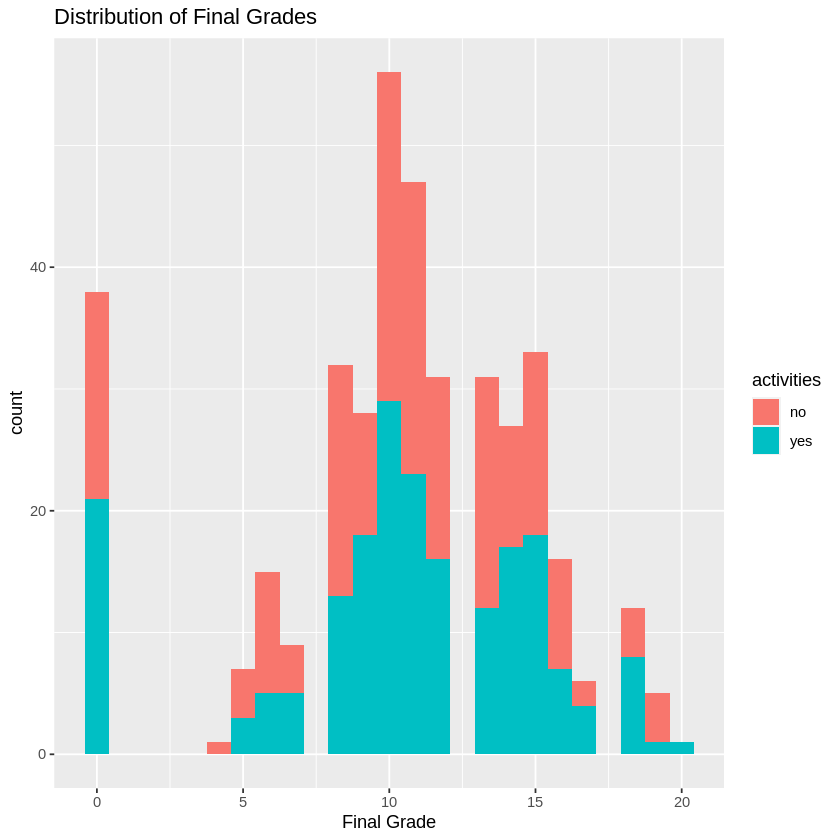

In [73]:
# Create a histogram to visualize the distribution of grades
students_grade_dist <- students_sample %>%
    ggplot(aes(x = final_grade, fill = activities)) +
    geom_histogram(bins = 25) + 
    xlab("Final Grade") +
    ggtitle("Distribution of Final Grades") +
    labs(fill = "Does extra-curricular activities?")

students_grade_dist

To further compare the distribution of final grades between the two categories, we generate a box plot. 


Once again, we observe that they have very similar means. With the boxplots, it also becomes more apparent that the range of grades for students in the `yes` category is higher than that of students in the `no` category (excluding the outliers with a grade of 0).

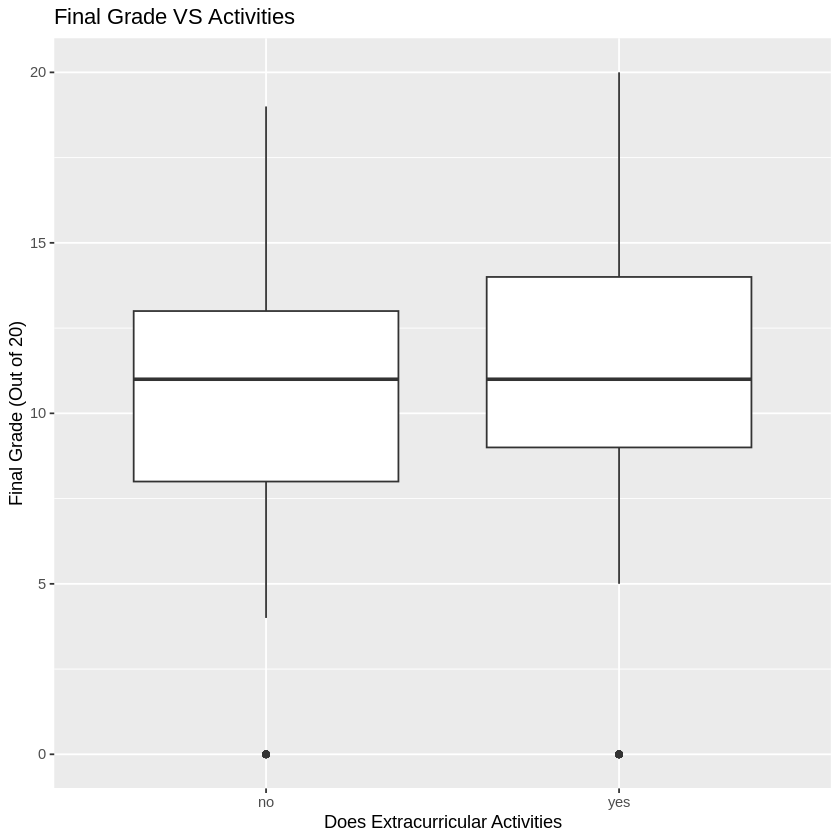

In [74]:
# Create a box plot to compare the distribution of grades between the two categories 
students_grade_boxplot <- students_sample %>%
    ggplot(aes(x = activities, y = final_grade)) +
    geom_boxplot() + 
    xlab("Does Extracurricular Activities") +
    ylab("Final Grade (Out of 20)") +
    ggtitle("Final Grade VS Activities")

students_grade_boxplot

## Methods: Plan

The choice of data from the Portuguese schools is directly relevant to the research question. The attributes include academic performance, demographic, and school-related factors, which are essential for studying student achievement. By employing hypothesis testing and confidence intervals, the report ensures that the findings are robust and not reliant on a single method. This would reduce the risk of drawing incorrect conclusions. The analysis process is fully documented and open-access via the web, facilitating reproducibility. 


In the initial stages of our analysis, we generated plots and point estimates to gain insights into the data. While these visualizations and single-value estimates offer valuable preliminary observations, they inherently lack rigor and statistical significance since they do not tell us the cause and effect, nor do they adequately disprove that the results obtained were not due to sampling variation. Hypothesis testing and confidence intervals provide quantitative measures of reliability and validity offering a more comprehensive and statistically grounded evaluation of research questions.

We plan to address these deficiencies by conducting a statistical analysis comparing the difference in means to determine if the results hold any significance.

**Hypothesis Testing.** We plan to use hypothesis testing for a difference in mean with a confidence level of 95% and a significance level of 5% for our tests. Let $\bar{x}_1$ represent the mean academic score of students participating in regular extracurricular activities and $\bar{x}_2$ represent the mean academic score of students who do not participate in regular extracurricular activities. Our proposed hypothesis test is as follows:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0$$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

This will be accomplished via bootstrapping, which will estimate the difference in population means, as using asymptotic methods to accomplish this is not feasible for a population of this size.

**Confidence Interval.** Should the null hypothesis be rejected, a confidence interval will also be calculated to provide a range of plausible values for the true values of the difference in population means. This will be calculated with a level of 95% using the formula:
$$CI = (x1-x2) ± (z^* * \sigma_M)$$
where $z^*$ is the critical value associated with the chosen confidence level of 95%, and $\sigma_M$ is the standard error of the difference in means. Should the null hypothesis not be rejected, a confidence interval would not need to be calculated as we are unable to acertain with the reasonable degree of certainty that the difference in population means obtained were not due to the chance and thus providing a plausible range for the difference in population means would not be useful.

**Expected Findings.** Given the preliminary analysis, we expect to discover that the data does not support the theory that extracurricular activities possess a discernable impact on a student’s academic performance and differences in academic achievement between the two groups can be attributed to sampling variation. Should our predicted findings be confirmed via statistical analysis, it may serve to quell parent's fears about enrolling their children in extracurriculars, and allow these children reap the benefits of extracurricular activities. Studies have shown that teens who participate in extracurricular activites show better mental health, social skills and interpersonal skills (Oberle et al., 2020). Inevitably, this leads to further questions about what factors do impact a student’s academic performance and we believe separate analysis on the other social factors recorded in this dataset can shed light on potential factors, such as household income, parental relationship, access to outside academic support, etc.


## References
Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Oberle, E., Ji, X. R., Kerai, S., Guhn, M., Schonert‐Reichl, K. A., & Gadermann, A. M. (2020). Screen time and extracurricular activities as risk and protective factors for mental health in adolescence: A population-level study. Preventive Medicine, 141, 106291. https://doi.org/10.1016/j.ypmed.2020.106291